In [1]:
import pandas as pd 
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import animation
import statistics
from IPython.display import clear_output

In [2]:
df = pd.read_csv("tarassov_important_interactions.csv") 
df

,Protein_A,Protein_B,Abd_A,Abd_B,Colony_Size
0,AAR2,LSM1,2.55,1066.00,23584
1,ABD1,TAF2,18.40,8.01,21605
2,ABD1,ECM4,18.40,21.90,21005
3,ABD1,RNR2,18.40,352.00,21044
4,ABF2,UBP6,640.00,126.00,21573
...,...,...,...,...,...
8554,ZIP2,DBP5,1.60,156.00,22056
8555,ZPR1,TAF2,119.00,8.01,22383
8556,ZPR1,ECM4,119.00,21.90,21555
8557,ZPR1,RNR2,119.00,352.00,38017


In [3]:
pro_A=df['Abd_A'].to_list()
pro_B=df['Abd_B'].to_list()
pro_A
A_mean,A_stdev=statistics.mean(pro_A),statistics.stdev(pro_A)
B_mean,B_stdev=statistics.mean(pro_B),statistics.stdev(pro_B)

In [4]:
# import matplotlib.pyplot as plt
# import numpy as np

# x = pro_A

# plt.hist(x)
# plt.show() 

In [5]:
Ai_max,Ai_min,Aj_max,Aj_min=df['Abd_A'].max(),df['Abd_A'].min(),df['Abd_B'].max(),df['Abd_B'].min()
print(Ai_max,Ai_min,Aj_max,Aj_min)
# print(math.ceil(Ai_max),math.floor(Ai_min),math.ceil(Aj_max),math.floor(Aj_min))
Ai_max,Ai_min,Aj_max,Aj_min=math.ceil(Ai_max),math.floor(Ai_min),math.ceil(Aj_max),math.floor(Aj_min)
Ai_max,Ai_min,Aj_max,Aj_min

9310.0 0.0 3420.0 0.13


(9310, 0, 3420, 0)

In [6]:
df.sort_values(by=['Colony_Size'], inplace=True, ascending=False)
df=df[1:11]

In [7]:
# df
df.reset_index(drop=True,inplace=True)

In [8]:
df

,Protein_A,Protein_B,Abd_A,Abd_B,Colony_Size
0,YNL190W,AGP1,835.0,10.6,214802
1,MET3,MET3,57.1,57.1,203046
2,SEC4,GDI1,234.0,172.0,194897
3,ERV29,AGP1,49.8,10.6,191611
4,YNL190W,GAP1,835.0,11.9,191457
5,VHS3,OST1,14.9,52.8,190626
6,VPH1,VMA13,149.0,207.0,182953
7,SRV2,SRV2,255.0,255.0,180483
8,YNL190W,OST1,835.0,52.8,179079
9,SHR3,GAP1,35.7,11.9,176711


In [9]:
Kd = []
for i in range(len(df)):
       Kd_rand = random.uniform(1, 10**4)
       Kd.append(Kd_rand)

Kd

[8609.383478436717,
 6939.187191628562,
 325.5807832176859,
 2125.3920746835433,
 5361.418592850499,
 5960.824730164078,
 5183.077077849269,
 9296.325301487019,
 8872.673683226818,
 9922.591569508822]

In [10]:
Ai = []
for i in range(len(df)):
#        Ai_rand = random.uniform(Ai_min, Ai_max)
       Ai_rand = abs(random.gauss(A_mean, A_stdev))
       Ai.append(Ai_rand)

print(Ai_min, Ai_max)
Ai

0 9310


[365.25953263471933,
 67.43108220334764,
 38.15297241291533,
 360.6961065936233,
 245.7154502091636,
 256.8934120468758,
 252.2921654996233,
 964.4369707603214,
 237.18575752328678,
 126.60986422318071]

In [11]:
Aj = []
for i in range(len(df)):
#        Aj_rand = random.uniform(Aj_min, Aj_max)
       Aj_rand = abs(random.gauss(B_mean, B_stdev))
       Aj.append(Aj_rand)
    
print(Aj_min, Aj_max)
Aj

0 3420


[92.28560033456425,
 166.5253863810531,
 269.19450577691043,
 217.05945593481746,
 139.22021882590894,
 45.096350936756636,
 133.38255500091364,
 461.75128298213383,
 158.71683078655303,
 53.86817624092377]

In [12]:
abd = pd.read_csv("tarassov_protein_abundances.csv") 
abd

,Systematic Name,Standard Name,Qualifier a,Mean molecules per cell,Median molecules per cell,Coefficient of Variation,LU,PENG,KUL,LAW,...,TKA,BRE,DEN,MAZ,CHO,YOF,NEW,LEE,DAV,GHA
0,YMR191W,SPG5,Verified,3.359783e+00,3.359783,NaN,NaN,NaN,3.359783e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YJL093C,TOK1,Verified,3.804228e+00,3.804228,NaN,NaN,NaN,3.804228e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,YER184C,TOG1,Verified,4.725730e+00,4.725730,NaN,NaN,NaN,4.725730e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YGL063W,PUS2,Verified,5.497247e+00,5.497247,NaN,NaN,NaN,5.497247e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YPL159C,PET20,Verified,6.922929e+00,6.922929,NaN,NaN,NaN,6.922929e+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5386,YCR012W,PGK1,Verified,1.048126e+06,535389.467835,118.212499,1898620.0,370624.0,5.612653e+05,3.696853e+06,...,632360.321606,762925.325484,3.869733e+06,NaN,535389.467835,NaN,467325.245209,1.013168e+06,2.518955e+06,314000.0
5387,YLR044C,PDC1,Verified,1.334957e+06,581219.289895,167.610282,1335789.0,284185.0,7.056524e+05,4.366751e+06,...,749870.982279,458461.578265,8.719740e+06,NaN,802711.880877,NaN,581219.289895,1.152585e+06,4.778059e+06,8970.0
5388,YHR174W,ENO2,Verified,1.392599e+06,736616.685356,169.701905,3055113.0,96517.0,9.298181e+05,9.756854e+05,...,698792.974393,786698.099060,9.928852e+06,NaN,711030.657259,762202.713453,867615.284478,1.926174e+06,3.651029e+06,2610.0
5389,YKL060C,FBA1,Verified,1.160837e+06,737008.613917,151.923907,2044661.0,276079.0,8.476516e+05,NaN,...,811477.040646,932942.583979,7.403471e+06,NaN,662540.187189,NaN,541286.587601,1.107529e+06,3.317388e+06,1020000.0


In [13]:
def fitness(Kda, Ai, Aj):
    Ki=0.00054
    a=0.1
    B=1.3
    MTX=440
    Kapp=1

    A=[]
    f_c=[]

    for i in range(len(df)):

        f_cur=(a*Kapp*Ki*Ai[i]*Aj[i])/((B*Ki*Kda[i])+(B*Kda[i]*MTX)+(Kapp*Ki*Ai[i]*Aj[i]))
        f_c.append(f_cur)
#         print(f_c)


        A.append(min(Ai[i],Aj[i])+Ai[i])
#         print(A,'\n')
    
    return A,f_c
#     print(A_total,'\n')
#     print(f_exp,'\n')
#     print(f_curr,'\n')

In [14]:
def fitness_exp(df):
    f_exp=[]
    for i in range(len(df)):
        f_exp_c=(1/96)*math.log(df['Colony_Size'][i]/20)
        f_exp.append(f_exp_c)

    return f_exp

In [15]:
def Kd_n(Kd):
    
    ddg=random.gauss(mu, sigma)
    Kd_new=[element * math.exp(B*ddg) for element in Kd]
    return Kd_new

In [16]:
def cost(A_total, f_exp, f_curr):
    f_sub=0
    A_sub=0
    for i in range(len(df)):
        f_sub+=(f_curr[i]-f_exp[i])**2
#         print(f_sub)
        if(len(abd.loc[abd['Standard Name'].str.contains(df['Protein_A'][i], case=False)]['Mean molecules per cell'][:1])>0):      
            A_sub+=(A_total[i]-abd.loc[abd['Standard Name'].str.contains(df['Protein_A'][i], case=False)]['Mean molecules per cell'][:1].values[0])
        elif(len(abd.loc[abd['Systematic Name'].str.contains(df['Protein_A'][i], case=False)]['Mean molecules per cell'][:1])>0):      
            A_sub+=(A_total[i]-abd.loc[abd['Systematic Name'].str.contains(df['Protein_A'][i], case=False)]['Mean molecules per cell'][:1].values[0])
        else:
            print(df['Protein_A'][i])
    
#     print(f_sub,A_sub)
    cost=f_sub+(A_sub**2)
    return cost
#     print('Cost: ',cost)
#     print(f_sub)
#     print(A_sub**2)

In [17]:
# mu = 1
# sigma = 1.7
# B=-0.01

# f_exp=fitness_exp(df)
# Kd_new=Kd_n(Kd)
# A_total, f_curr=fitness(Kd, Ai, Aj)
# A_total_new, f_curr_new=fitness(Kd_new, Ai, Aj)
# C_old=cost(A_total, f_exp, f_curr)
# print('\n\n')
# C_new=cost(A_total_new, f_exp, f_curr_new)
# print(Kd,'\n\n',Kd_new,'\n\n',f_curr,'\n\n',f_curr_new,'\n\n',C_old,'\n\n',C_new)

In [18]:
# a=Kd_n(Kd)
# a

In [19]:
Kd

[8609.383478436717,
 6939.187191628562,
 325.5807832176859,
 2125.3920746835433,
 5361.418592850499,
 5960.824730164078,
 5183.077077849269,
 9296.325301487019,
 8872.673683226818,
 9922.591569508822]

In [20]:
A_total, f_curr=fitness(Kd, Ai, Aj)
A_total, f_curr

([457.5451329692836,
  134.86216440669529,
  76.30594482583066,
  577.7555625284408,
  384.9356690350726,
  301.98976298363243,
  385.674720500537,
  1426.1882537424553,
  395.9025883098398,
  180.47804046410448],
 [3.6962304546589526e-07,
  1.5276663451828133e-07,
  2.97796830646988e-06,
  3.4774684872169525e-06,
  6.02351010300475e-07,
  1.8347817747354245e-07,
  6.129282880771159e-07,
  4.522183767343848e-06,
  4.0054612916240455e-07,
  6.48890799127023e-08])

In [21]:
Kd

[8609.383478436717,
 6939.187191628562,
 325.5807832176859,
 2125.3920746835433,
 5361.418592850499,
 5960.824730164078,
 5183.077077849269,
 9296.325301487019,
 8872.673683226818,
 9922.591569508822]

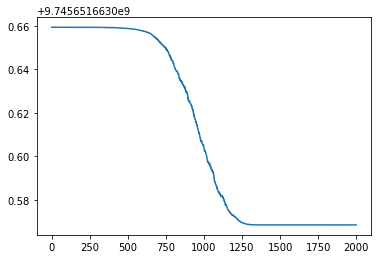

In [22]:
t=0

mu = 1
sigma = 1.7
B=-0.01
dC_array=[]
C_new_array=[]
while(t<2000):
    
    f_exp=fitness_exp(df)
    Kd_new=Kd_n(Kd)
    A_total, f_curr=fitness(Kd, Ai, Aj)
    A_total_new, f_curr_new=fitness(Kd_new, Ai, Aj)
    C_old=cost(A_total, f_exp, f_curr)
    C_new=cost(A_total_new, f_exp, f_curr_new)
    dC=C_new-C_old
    
#     dC_array.append(dC)
    C_new_array.append(C_new)
#     print(t,B,dC)
    
#     print(Kd,'\n\n',Kd_new,'\n\n',A_total,'\n\n',A_total_new,'\n\n',C_new,C_old,dC)
    if((random.random()<=math.exp(B*dC)) and dC<=0):
#         print('1')
        Kd_new_temp=Kd_new
    else:
#         print('2')
        Kd_new_temp=Kd
    
    Kd=Kd_new_temp
    t=t+1
    
#     E_a=random.gauss(0, 1)
#     E_b=random.gauss(0, 1)
#     Ai=[element*(10**E_a) for element in Ai]
#     Aj=[element*(10**E_b) for element in Aj]
    
#     count=0
#     x=[]
#     y=C_new_array

#     for a in range(len(y)):
#         x.append(a)

#     plt.plot(x,y)
#     plt.show()
#     clear_output(wait=False)

#     print(t,B,dC)
#     if dC<=math.exp(-3):
#         break
    
# print(Kd,'\n\n', Kd_new,'\n\n', Kd_new_temp,'\n\n',dC,'\n TIME:',t)

count=0
x=[]
y=C_new_array

for a in range(len(y)):
    x.append(a)
    
plt.plot(x,y)
plt.show()

In [23]:
Ai[0]*(10**0.001)

366.1015428176647

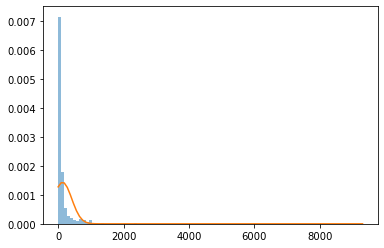

In [24]:
import scipy
from scipy.stats import norm

# data = np.random.normal(0, 1, 1000)
data=pro_A
_, bins, _ = plt.hist(data, 100, density=1, alpha=0.5)

mu, sigma = scipy.stats.norm.fit(data)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)

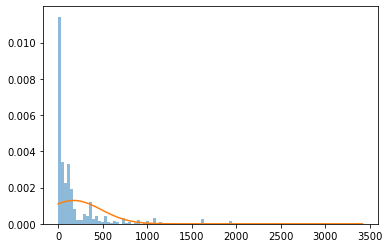

In [25]:
import scipy
from scipy.stats import norm

# data = np.random.normal(0, 1, 1000)
data=pro_B
_, bins, _ = plt.hist(data, 100, density=1, alpha=0.5)

mu, sigma = scipy.stats.norm.fit(data)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)

In [27]:
best_fit_line,bins

(array([1.09830765e-03, 1.16163928e-03, 1.21375614e-03, 1.25286553e-03,
        1.27758661e-03, 1.28703132e-03, 1.28085731e-03, 1.25928856e-03,
        1.22310188e-03, 1.17358049e-03, 1.11243847e-03, 1.04172237e-03,
        9.63697760e-04, 8.80729577e-04, 7.95164868e-04, 7.09226014e-04,
        6.24920831e-04, 5.43974093e-04, 4.67782858e-04, 3.97395789e-04,
        3.33514783e-04, 2.76515696e-04, 2.26483913e-04, 1.83260050e-04,
        1.46491057e-04, 1.15682402e-04, 9.02477431e-05, 6.95533857e-05,
        5.29557437e-05, 3.98309568e-05, 2.95965628e-05, 2.17257454e-05,
        1.57550928e-05, 1.12870414e-05, 7.98825904e-06, 5.58517818e-06,
        3.85775637e-06, 2.63236090e-06, 1.77447113e-06, 1.18169477e-06,
        7.77417948e-07, 5.05262052e-07, 3.24408087e-07, 2.05768804e-07,
        1.28937803e-07, 7.98167182e-08, 4.88112963e-08, 2.94889756e-08,
        1.75999690e-08, 1.03771236e-08, 6.04442435e-09, 3.47812972e-09,
        1.97719487e-09, 1.11036572e-09, 6.16020957e-10, 3.376274

In [28]:
C_new_array

[9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.65941,
 9745651663.659409,
 9745651663.659409,
 9745651663.659409,
 9745651663.659409,
 9745651663.659409,
 9745651663.659409,
 9745651663.659409,
 9745651663.659409,
 9745651663.659409,
 9745651663.659409,
 9745651663.659409,
 

In [29]:
C_new_array[-10:]

[9745651663.56848,
 9745651663.568478,
 9745651663.56848,
 9745651663.56848,
 9745651663.568478,
 9745651663.568478,
 9745651663.56848,
 9745651663.568478,
 9745651663.568478,
 9745651663.56848]

In [30]:
Kd

[0.0004531440425357701,
 0.00036523536717845945,
 1.7136533951443088e-05,
 0.00011186733162807907,
 0.0002821915066247999,
 0.0003137404927819759,
 0.00027280472588004284,
 0.0004893003591249355,
 0.0004670019904431297,
 0.0005222630943900081]